In [72]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [46]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [47]:
# Максимальное количество слов 
num_words = 12000
# Максимальная длина новости
max_news_len = 120
# Количество классов новостей
num_topics = 10

In [48]:
train = pd.read_csv("/gdrive/MyDrive/news/news_train.txt", sep="\t", header=None)
test = pd.read_csv("/gdrive/MyDrive/news/news_test.txt", sep="\t", header=None)
train.rename(columns={0: 'topic', 1: 'header', 2: 'text'}, inplace=True)
test.rename(columns={0: 'topic', 1: 'header', 2: 'text'}, inplace=True)

In [49]:
train

,topic,header,text
0,sport,Овечкин пожертвовал детской хоккейной школе ав...,Нападающий «Вашингтон Кэпиталз» Александр Овеч...
1,culture,Рекордно дорогую статую майя признали подделкой,"Власти Мексики объявили подделкой статую майя,..."
2,science,Samsung представила флагман в защищенном корпусе,Южнокорейская Samsung анонсировала защищенную ...
3,sport,С футболиста «Спартака» сняли четырехматчевую ...,Контрольно-дисциплинарный комитет (КДК) РФС сн...
4,media,Hopes & Fears объединится с The Village,Интернет-издание Hopes & Fears объявило о свое...
...,...,...,...
14995,life,Составлен рейтинг лучших европейских пляжей 20...,Опубликован рейтинг лучших европейских пляжей ...
14996,media,В «Снобе» объяснили причину смены формата,Генеральный директор «Сноб медиа» Марина Гевор...
14997,economics,Минфин предложил штрафовать за биткоины на 50 ...,"Минфин разработал законопроект, устанавливающи..."
14998,life,Мэл Гибсон заплатит бывшей подруге 750 тысяч д...,Актер и режиссер Мэл Гибсон выплатит своей быв...


In [50]:
train['topic'] = pd.factorize(train['topic'], sort=True)[0]

In [51]:
y_train = utils.to_categorical(train['topic'], num_topics)
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [52]:
news = train['header'] + ' ' + train['text']

In [53]:
tokenizer = Tokenizer(num_words=num_words)

In [54]:
tokenizer.fit_on_texts(news)

In [55]:
tokenizer.word_index

{'в': 1,
 'на': 2,
 'и': 3,
 'с': 4,
 'по': 5,
 'что': 6,
 'не': 7,
 'из': 8,
 '—': 9,
 'за': 10,
 'года': 11,
 'о': 12,
 'для': 13,
 'как': 14,
 'к': 15,
 'этом': 16,
 'а': 17,
 'об': 18,
 'году': 19,
 'также': 20,
 'от': 21,
 'он': 22,
 'его': 23,
 'россии': 24,
 'до': 25,
 'сообщает': 26,
 'будет': 27,
 'после': 28,
 'был': 29,
 'долларов': 30,
 'время': 31,
 'при': 32,
 '1': 33,
 'у': 34,
 'со': 35,
 'это': 36,
 'того': 37,
 'компании': 38,
 'во': 39,
 'который': 40,
 'ее': 41,
 'сша': 42,
 '2': 43,
 'однако': 44,
 'рублей': 45,
 'словам': 46,
 'более': 47,
 'the': 48,
 'том': 49,
 'их': 50,
 'было': 51,
 'но': 52,
 '5': 53,
 'которые': 54,
 'ранее': 55,
 'заявил': 56,
 'то': 57,
 'процентов': 58,
 'тысяч': 59,
 'были': 60,
 'миллионов': 61,
 'так': 62,
 'лет': 63,
 'уже': 64,
 'она': 65,
 'они': 66,
 'была': 67,
 '3': 68,
 'материалы': 69,
 'под': 70,
 'компания': 71,
 'может': 72,
 'все': 73,
 'или': 74,
 'является': 75,
 'только': 76,
 'этого': 77,
 'около': 78,
 'процента': 79,

In [56]:
sequences = tokenizer.texts_to_sequences(news)

In [57]:
print(news[0])
print(sequences[0])

Овечкин пожертвовал детской хоккейной школе автомобиль Нападающий «Вашингтон Кэпиталз» Александр Овечкин передал детской хоккейной школе автомобиль, полученный им после окончания Матча всех звезд Национальной хоккейной лиги (НХЛ). Об этом сообщается на официальном сайте лиги.Автомобиль Honda Accord был подарен хоккеисту по решению спонсоров мероприятия. Игрок НХЛ пожертвовал машину спортивной школе Nova Cool Cats Special Hockey Inc., которая расположена в штате Вирджиния.Овечкин общается с 10-летней девочкой Анной Шоб с синдромом Дауна, которая занимается в этой школе и является поклонницей спортсмена. В сентябре форвард пообедал вместе с юной хоккеисткой в японском ресторане.Матч всех звезд НХЛ в Коламбусе (штат Огайо) завершился победой команды «Джонатана Тэйвза» над командой «Ника Фолиньо» со счетом 17:12. Овечкин выступал за проигравший коллектив. Россиянин отметился тремя результативными передачами.
[4570, 3626, 2403, 3302, 1503, 1213, 10593, 332, 4570, 3769, 3626, 2403, 3302, 150

In [58]:
x_train = pad_sequences(sequences, maxlen=max_news_len)

In [59]:
x_train[1]

array([  351,    15,   282,     8,  3115,  2064,  9144,     6,  5483,
        2952,    15, 10863,  8947,  8243,   803,   412,    44,   165,
           7,   524,    34,  8076,  1273,   424,   732,    37,   269,
           5,   924,  4057,   963,  2867,  6827,  8947,  2979,  4010,
        6200,    44,  1177,  8076,  3333,  7905,     3,  1125,  2628,
          13,   263,     7,  4940,     3,   408,     6,  1125,     4,
           3,  1299,   115,    51,  6317,     1,   412,  6200,    64,
          18,    16,   268,   484,  8244,    67,  1361,  5051,  4011,
       10327, 11854,    41,  3282, 11855,     8,   397,  7906,   125,
         463,  8584,     2,  2369,   115,     2,   486,  3658,    51,
          96,    83,   101,   145,    14,   293,     1,   234,  8948,
       11497,  6318,   189,   216,     6,  2053,     8,  2980,     8,
        1465, 11854,   744,  2386,   228,    73,    84,  2463,     2,
        2164,     7,    99], dtype=int32)

## Сеть GRU

In [60]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 64, input_length=max_news_len))
model_gru.add(GRU(256))
model_gru.add(Dense(10, activation='softmax'))

In [61]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [62]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 64)           768000    
                                                                 
 gru_2 (GRU)                 (None, 256)               247296    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,017,866
Trainable params: 1,017,866
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [64]:
history_gru = model_gru.fit(x_train, 
                            y_train, 
                            epochs=20,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_gru])

Epoch 1/20
106/106 [==============================] - ETA: 0s - loss: 2.0644 - accuracy: 0.2401
Epoch 1: val_accuracy improved from -inf to 0.42667, saving model to best_model_gru.h5
106/106 [==============================] - 4s 21ms/step - loss: 2.0644 - accuracy: 0.2401 - val_loss: 1.6500 - val_accuracy: 0.4267
Epoch 2/20
105/106 [============================>.] - ETA: 0s - loss: 1.1893 - accuracy: 0.5900
Epoch 2: val_accuracy improved from 0.42667 to 0.65800, saving model to best_model_gru.h5
106/106 [==============================] - 2s 15ms/step - loss: 1.1886 - accuracy: 0.5904 - val_loss: 0.9972 - val_accuracy: 0.6580
Epoch 3/20
105/106 [============================>.] - ETA: 0s - loss: 0.6418 - accuracy: 0.7881
Epoch 3: val_accuracy improved from 0.65800 to 0.71067, saving model to best_model_gru.h5
106/106 [==============================] - 2s 16ms/step - loss: 0.6417 - accuracy: 0.7879 - val_loss: 0.8442 - val_accuracy: 0.7107
Epoch 4/20
104/106 [============================>

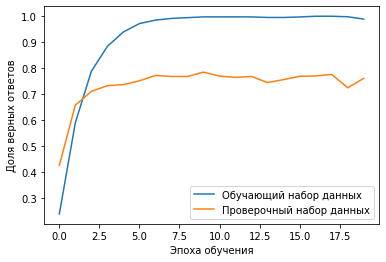

In [65]:
plt.plot(history_gru.history['accuracy'], 
         label='Обучающий набор данных')
plt.plot(history_gru.history['val_accuracy'], 
         label='Проверочный набор данных')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Оценка на тестовом множестве

In [66]:
test

,topic,header,text
0,culture,Жительница Ямала победила в первом песенном ко...,Жительница Ямало-Ненецкого автономного округа ...
1,media,Почти половина Twitter-пользователей никогда н...,Около 44 процентов из всех зарегистрированных ...
2,media,"Билайн начал рекламу роуминга под песенку ""Тро...",В новой рекламной кампании мобильного оператор...
3,business,"Saipem потеряла 1,2 миллиарда евро из-за отмен...",Дочерняя структура итальянского нефтегазового ...
4,culture,Вин Дизель назвал «Форсаж 7» достойным «Оскара»,"Актер Вин Дизель заявил, что боевик «Форсаж 7»..."
...,...,...,...
2995,science,"Причиной ""влажного"" климата Титана оказались м...","Ученые прояснили причины ""влажного"" климата Ти..."
2996,life,Британка нашла геккона в пакете с брокколи,Жительница Великобритании нашла геккона в паке...
2997,business,Владелец «Мечела» предложил закрыть в России в...,Совладелец горно-металлургического холдинга «М...
2998,science,Nokia выпустит ОС для бюджетных смартфонов,Компания Nokia разрабатывает операционную сист...


In [67]:
test['topic'] = pd.factorize(test['topic'], sort=True)[0]

In [68]:
test_news = test['header'] + ' ' + test['text']

In [69]:
test_sequences = tokenizer.texts_to_sequences(test_news)

In [70]:
x_test = pad_sequences(test_sequences, maxlen=max_news_len)

In [71]:
y_test = utils.to_categorical(test['topic'], num_topics)

In [43]:
model_gru.evaluate(x_test, y_test, verbose=1)

94/94 [==============================] - 1s 6ms/step - loss: 1.0444 - accuracy: 0.7923


[1.0444165468215942, 0.7923333048820496]